In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 
from fast_glcm import fast_glcm, fast_glcm_mean, fast_glcm_std, fast_glcm_contrast, fast_glcm_dissimilarity, fast_glcm_entropy, fast_glcm_homogeneity
from image_extractor import init_lut,apply_lut, hsv_filter, histogram_analysis, statistic_analysis, geometry_analysis, linear_fn, curved, CLAHE, contour_extractor, seperate_chanel, hsv_contour_extract

# image_dir  = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Agglutinated/image (99).JPG'
image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Plated_Purple/image (6).JPG'
# image_dir = 'D:/Thesis_data/Backups/Color_Corrected_512x512/Compartmentalized_Purple/image (32).JPG'


plt.rcParams['figure.dpi'] = 102.46

image  = cv2.imread(image_dir)
# image2 = cv2.imread(image2_dir)
# im_shape = np.shape(image)
lut1 = init_lut(fn=linear_fn, coefficient=10)
lut2 = init_lut(fn=curved, coefficient=1.5)

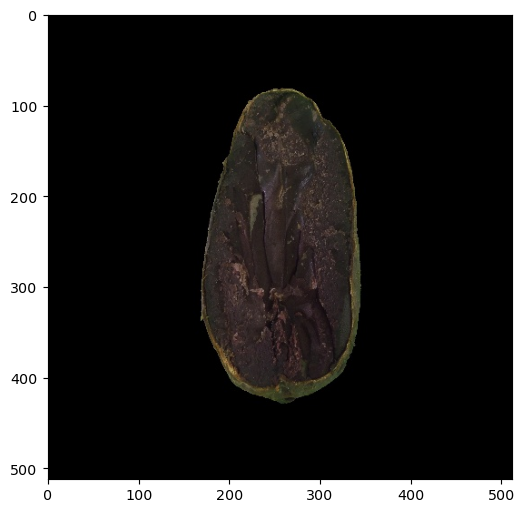

In [32]:
origin_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(origin_rgb)
plt.show()

In [33]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_hsv = apply_lut(image_hsv, 2, lut2)   #tang brightness
image_hsv = apply_lut(image_hsv, 1, lut1)   #tang Sat
image_hsv = hsv_filter(image_hsv)

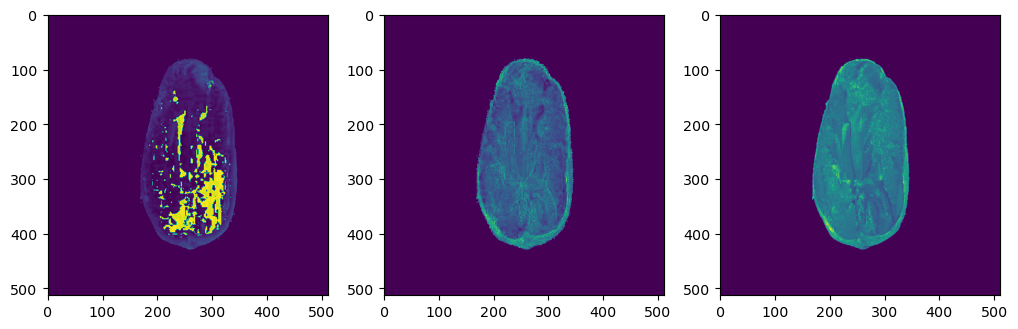

In [34]:
plt.rcParams["figure.figsize"] = (12,6)
h,s,v = seperate_chanel(image_hsv, plot=True)

(9,)
(212, 281, 111, 118, 5049.5, 804.5640535354614, 89.19475555419922, 159.1667022705078, 33.704654693603516, 1.7447250212453758, 8511.0, 74.62080383300781, 0.5932910351310069, 0.3855168728050084, 17.92344832893492)
[[42.57466788822721 50.75889448770805 50.278210413803635]
 [42.0 34.0 33.0]
 [19.13263802178752 58.99894333763634 58.87451439020103]
 [0.3126757245322254 3.0128747973617025 3.0554898083983657]
 [2.498038567574583 7.598571381707522 7.784808083028041]]
(299, 337, 12, 38, 204.5, 110.87005710601807, 12.141637802124023, 41.09425735473633, 176.782470703125, 1.9180334797482506, 311.5, 18.66825294494629, 0.6565008025682183, 0.44846491228070173, 2.9154759474226504)
[[26.86622807017544 98.22587719298245 99.00657894736842]
 [33.0 31.0 32.0]
 [20.553271877978695 105.39084765401012 104.83451113671836]
 [0.13129006386868186 0.8036833000603386 0.8055620686003322]
 [-0.12925527962894812 -1.327201607221054 -1.3267277857745081]]
(267, 321, 22, 22, 172.0, 87.5979790687561, 12.567723274230957

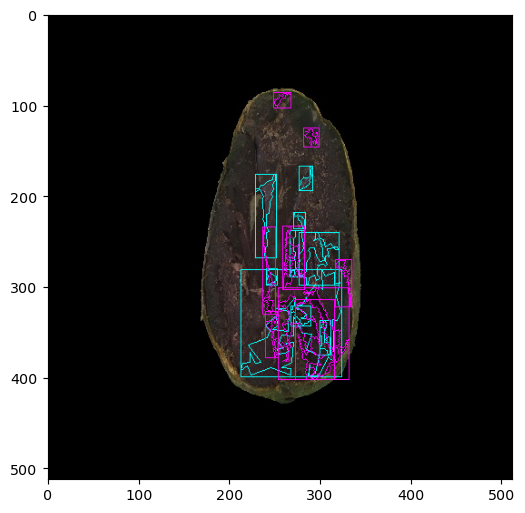

In [35]:
ctH, ctV = hsv_contour_extract(image, hsv=False)
print(np.shape(ctH))
for cnt in ctH:
    cv2.drawContours(origin_rgb, [cnt], -1, (0, 255, 255), 1)
    (x,y,w,h) = cv2.boundingRect(cnt)
    cv2.rectangle(origin_rgb,(x,y),(x+w, y+h),(0,255,255), 1)
    print(geometry_analysis(cnt))
    print(statistic_analysis(origin_rgb[y:y+h,x:x+w]))

for cnt in ctV:
    cv2.drawContours(origin_rgb, [cnt], -1, (255, 0, 255), 1)
    (x,y,w,h) = cv2.boundingRect(cnt)
    cv2.rectangle(origin_rgb,(x,y),(x+w, y+h),(255,0,255), 1)
plt.imshow(origin_rgb)
plt.show()